In [2]:
# -*- coding: utf-8 -*-
# Indentation: Jupyter Notebook

'''
sklearn exploration
'''

__version__ = 1.0
__author__ = "Sourav Raj"
__author_email__ = "souravraj.iitbbs@gmail.com"


In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

In [5]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [6]:
data.shape

(200, 4)

In [8]:
import seaborn as sns
%matplotlib inline

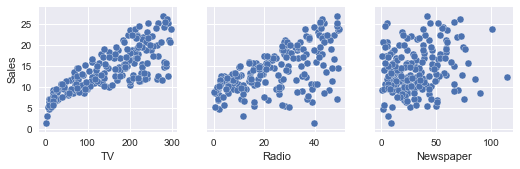

In [11]:
#visualize the relation between the features and response using scatterplate
sns.pairplot(data, x_vars= ["TV", "Radio", "Newspaper"], y_vars="Sales")


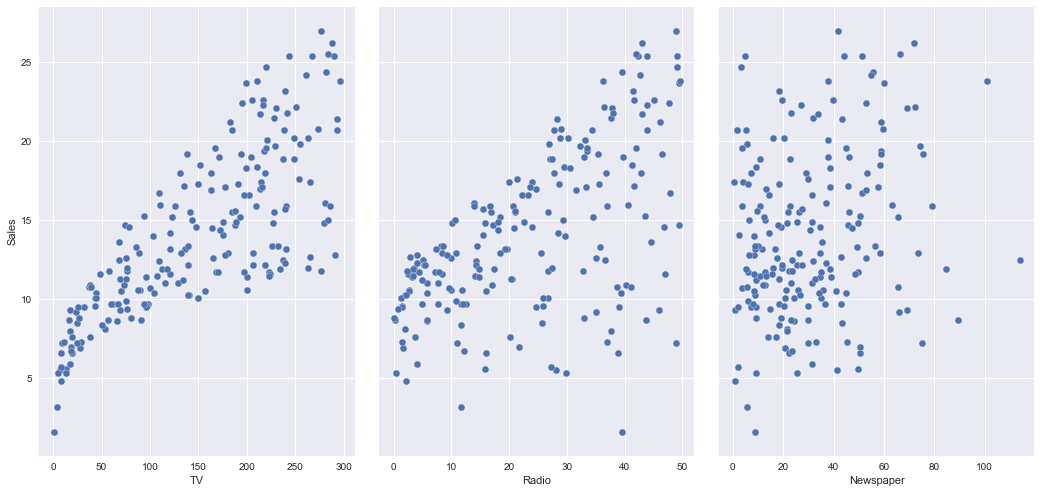

In [12]:
sns.pairplot(data, x_vars= ["TV", "Radio", "Newspaper"], y_vars="Sales", size=7, aspect=0.7)


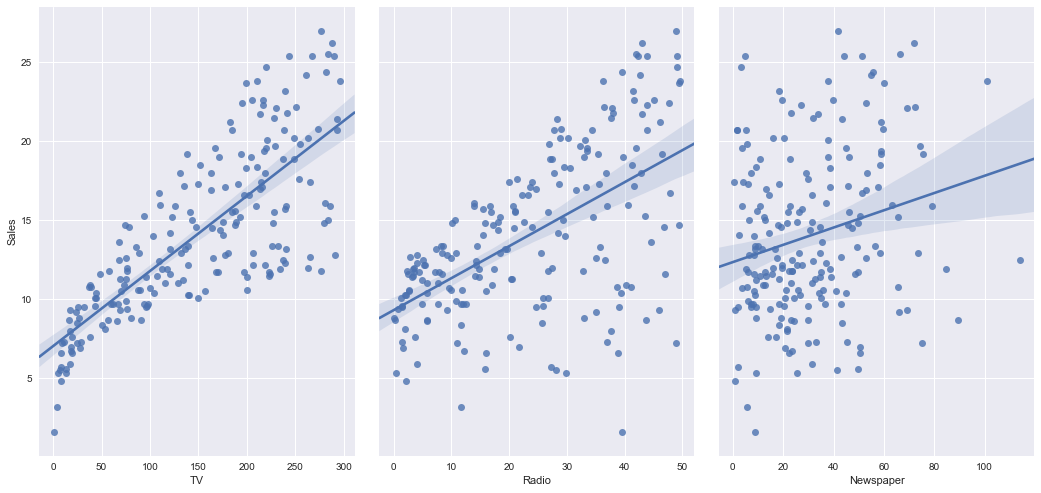

In [13]:
sns.pairplot(data, x_vars= ["TV", "Radio", "Newspaper"], y_vars="Sales", size=7, aspect=0.7, kind='reg')


In [18]:
feature_cols = ["TV", "Radio", "Newspaper"]
#x=data[feature_cols]

x=data[["TV", "Radio", "Newspaper"]]



In [19]:
x.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [20]:
type(x)
x.shape

(200, 3)

In [21]:
y=data.Sales

In [22]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [23]:
y.shape

(200L,)

In [24]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1)


In [25]:
x_train.shape

(150, 3)

In [26]:
x_test.shape

(50, 3)

In [27]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
linreg.intercept_

2.8769666223179318

In [29]:
linreg.coef_

array([ 0.04656457,  0.17915812,  0.00345046])

In [30]:
zip(feature_cols, linreg.coef_)

[('TV', 0.046564567874150281),
 ('Radio', 0.17915812245088836),
 ('Newspaper', 0.0034504647111804347)]

In [31]:
y_pred= linreg.predict(x_test)

In [32]:
#mean absolute error
from sklearn import metrics


In [35]:
metrics.mean_absolute_error(y_test, y_pred)

1.0668917082595213

In [34]:
metrics.mean_squared_error(y_pred, y_test)

1.9730456202283384

In [38]:
import numpy as np

In [39]:
#root mean square error
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

1.4046514230328955

In [40]:
#let's remove newspaper from feature as it is hardly correlated with sales

feature_cols = ["TV", "Radio"]
x=data[feature_cols]

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=1)

In [42]:
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
y_pred = linreg.predict(x_test)

In [44]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.3879034699382888